In [1]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import six
import sys
sys.modules['sklearn.externals.six'] = six
import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)

In [2]:
pd.options.display.float_format="{:,.3f}".format

In [3]:
#Loading data
df=pd.read_csv('Disneyland_Reviews.csv',encoding='latin-1')
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [4]:
#Changing to lowe case letter the Rview_Text feature
df['Review_Text']=df['Review_Text'].str.lower()
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,if you've ever been to disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,its been a while since d last time we visit hk...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,thanks god it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,hk disneyland is a great compact park. unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [5]:
#Dropping "Review_ID" ,"Reviewer_Location" and 'Year_Month' features
df=df.drop(columns=["Review_ID", 'Reviewer_Location','Year_Month'])
df.head()

,Rating,Review_Text,Branch
0,4,if you've ever been to disneyland anywhere you...,Disneyland_HongKong
1,4,its been a while since d last time we visit hk...,Disneyland_HongKong
2,4,thanks god it wasn t too hot or too humid wh...,Disneyland_HongKong
3,4,hk disneyland is a great compact park. unfortu...,Disneyland_HongKong
4,4,"the location is not in the city, took around 1...",Disneyland_HongKong


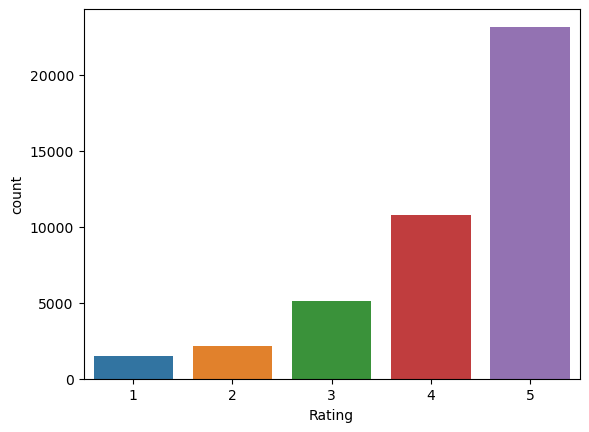

In [6]:
#Plotting the distributions of Ratings
import seaborn as sns
sns.countplot(data=df,x='Rating');

In [7]:
#Substracting 1 of the "Rating" feature in order to have values between 0 and 4
df['Rating']=df['Rating']-1
df.head()

,Rating,Review_Text,Branch
0,3,if you've ever been to disneyland anywhere you...,Disneyland_HongKong
1,3,its been a while since d last time we visit hk...,Disneyland_HongKong
2,3,thanks god it wasn t too hot or too humid wh...,Disneyland_HongKong
3,3,hk disneyland is a great compact park. unfortu...,Disneyland_HongKong
4,3,"the location is not in the city, took around 1...",Disneyland_HongKong


## Creating an evaluation function for our model experiments

In [9]:
#Function to evaluate: accuracy,precision,recall,f1-score
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_results(y_true,y_pred):
  #Calculate model accuracy
  model_accuracy=accuracy_score(y_true,y_pred)

  #Calculate model precision,recall and f1-score using "weighted average"
  model_precision,model_recall,model_f1,_=precision_recall_fscore_support(y_true,y_pred,average='weighted',zero_division=0)
  model_results={'accuracy':model_accuracy.round(3),
                 'precision':model_precision.round(3),
                 "recall":model_recall.round(3),
                 "f1":model_f1.round(3)}
              
  return model_results

## Defining train and test datasets

In [10]:
#Defining X and y
X=df.drop(columns=["Rating"])
y=df[["Rating"]]

In [11]:
#Splitting the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, stratify=y,random_state=42)

In [12]:
X_train

,Review_Text,Branch
4511,"lots of fun attractions, short ride waits, eas...",Disneyland_HongKong
29098,i was very surprised that euro disney did not ...,Disneyland_Paris
4041,this was the second time we visited this disne...,Disneyland_HongKong
1364,we was very pleased with our visit. the attrac...,Disneyland_HongKong
23996,a bucket list experience. not so much for the...,Disneyland_California
...,...,...
35574,the park is dated and in need of a thorough ov...,Disneyland_Paris
20448,we spent 5 days at the disneyland park in sept...,Disneyland_California
19209,"loved disneyland, loved the park hopper to cal...",Disneyland_California
218,it was fun to go to hk disneyland. we stayed a...,Disneyland_HongKong


## Making different kind of feature labels for the experiments

In [161]:
#One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder()
train_labels_one_hot=one_hot_encoder.fit_transform(y_train.to_numpy().reshape(-1,1)).toarray()
test_labels_one_hot=one_hot_encoder.transform(y_test.to_numpy().reshape(-1,1)).toarray()

#Labels encoded
train_labels_encoded=y_train.to_numpy().ravel()
test_labels_encoded=y_test.to_numpy().ravel()

num_classes=5

In [162]:
train_labels_encoded

array([3, 2, 3, ..., 4, 3, 4], dtype=int64)

# Starting a series of modelling experiments only with the "Review_Text" column as the unique feature

## Model 0: Testing the basic machine learning models, finding out the best and tuning it

In [15]:
#Importing the libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Ensemble
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,AdaBoostClassifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#Preparing the models
models=[]
models.append(("Logistic Regression",LogisticRegression(solver="lbfgs",max_iter=10000,multi_class="multinomial")))
models.append(("MultinomialNB",MultinomialNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("XGB Classifier",XGBClassifier(objective="multi:softmax")))
models.append(("Cat Boost Classifier",CatBoostClassifier(n_estimators =100,learning_rate=0.1, max_depth=3, random_state=500,verbose=0)))
models.append(("LGBM Classifier",LGBMClassifier(max_depth = 3, learning_rate = 0.1, n_estimators = 10, objective='multiclass', seed=500,verbose=-100,force_row_wise=True,silent = True)))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Bagging Class",BaggingClassifier()))
models.append(("Extra trees",ExtraTreesClassifier()))
models.append(("Ada Boost",AdaBoostClassifier()))

#Evaluating each model in turn
results=[]
names=[]
scoring="accuracy"

for name, model in models:
    kfold=KFold(n_splits=10,shuffle=True)
    #Create a pipeline
    model_0=Pipeline([
    ("tf-idf",TfidfVectorizer()),
    ('clf',model)
    ])
    cv_results=cross_val_score(model_0,X_train[['Review_Text']].values.ravel(),train_labels_encoded,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name} :{cv_results.mean()*100:,.2f}% ({cv_results.std()*100:.2f}%)")

Logistic Regression :62.41% (0.91%)
MultinomialNB :54.27% (0.44%)
KNN :51.15% (0.84%)
Decision Tree :47.19% (0.79%)
XGB Classifier :60.23% (0.95%)
Cat Boost Classifier :56.76% (0.96%)
LGBM Classifier :54.47% (0.76%)
Random Forest :54.99% (0.80%)
Bagging Class :54.28% (0.74%)
Extra trees :54.78% (1.04%)
Ada Boost :57.44% (0.72%)


In [27]:
#Fine Tuning the best model

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

#Build the steps
steps=[("tf-idf",TfidfVectorizer()),('logreg',LogisticRegression(solver="lbfgs",max_iter=10000,multi_class="multinomial"))]


pipeline=Pipeline(steps)

#Create the parameter space
parameters = {
    'logreg__C': np.linspace(0.001,1,20)
}


kfold=KFold(n_splits=5,shuffle=True)

grid_result=GridSearchCV(estimator=pipeline,param_grid=parameters,cv=kfold)

grid_result.fit(X_train[['Review_Text']].values.ravel(),train_labels_encoded) 

#Summarize_results

print("Best : %f using the params %s" % (grid_result.best_score_ , grid_result.best_params_))

means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]


for mean,stdev,param in zip(means,stds,params):
    
  print("%f (%f) with %r" % (mean,stdev,param))

Best : 0.623865 using the params {'logreg__C': 1.0}
0.542617 (0.008019) with {'logreg__C': 0.001}
0.565056 (0.006394) with {'logreg__C': 0.05357894736842105}
0.584815 (0.004897) with {'logreg__C': 0.1061578947368421}
0.594628 (0.005116) with {'logreg__C': 0.15873684210526315}
0.601058 (0.005775) with {'logreg__C': 0.2113157894736842}
0.606316 (0.006132) with {'logreg__C': 0.26389473684210524}
0.609464 (0.005715) with {'logreg__C': 0.3164736842105263}
0.612479 (0.006030) with {'logreg__C': 0.36905263157894735}
0.615828 (0.006299) with {'logreg__C': 0.4216315789473684}
0.617536 (0.006421) with {'logreg__C': 0.47421052631578947}
0.618942 (0.007109) with {'logreg__C': 0.5267894736842105}
0.620215 (0.007656) with {'logreg__C': 0.5793684210526315}
0.621153 (0.007845) with {'logreg__C': 0.6319473684210526}
0.621454 (0.007562) with {'logreg__C': 0.6845263157894736}
0.621622 (0.008420) with {'logreg__C': 0.7371052631578947}
0.622157 (0.008639) with {'logreg__C': 0.7896842105263158}
0.622626 (0.

In [29]:
#Evaluating our best classic machine learning model
baseline_score=grid_result.score(X_test[['Review_Text']].values.ravel(),test_labels_encoded)
print(f"Our baseline model achieves an accuracy of:{baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of:62.90%


In [30]:
#Making predictions
baseline_preds=grid_result.predict(X_test[['Review_Text']].values.ravel())
baseline_preds[:10]

array([4, 3, 4, 4, 2, 4, 3, 3, 4, 4], dtype=int64)

In [31]:
#Get baseline results
baseline_results=calculate_results(test_labels_encoded,baseline_preds)
baseline_results

{'accuracy': 0.629, 'precision': 0.594, 'recall': 0.629, 'f1': 0.601}

In [ ]:
#Saving the fine_tuned model
from pickle import dump
dump(grid_result,open("model_0.pkl","wb"))

In [17]:
#Loading the model
import pickle
loaded_model = pickle.load(open('model_0.pkl', 'rb'))

In [18]:
#Making predictions

baseline_preds=loaded_model.predict(X_test[['Review_Text']].values.ravel())

#Get baseline results

baseline_results=calculate_results(test_labels_encoded,baseline_preds)

baseline_results

{'accuracy': 0.629, 'precision': 0.594, 'recall': 0.629, 'f1': 0.601}

## Model 1: Dense model using Sequential API + TF-IDF

In [29]:
import tensorflow as tf
import numpy as np
from keras.layers import Dense
from keras import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tv=TfidfVectorizer()
tv.fit(X_train[['Review_Text']].values.ravel())

#Changing the data type to another one which uses less memory works with astype(np.uint8)
X_train_model_1=tv.transform(X_train[['Review_Text']].values.ravel()).astype(np.uint8).toarray() 
X_test_model_1=tv.transform(X_test[['Review_Text']].values.ravel()).astype(np.uint8).toarray() 

model_1=Sequential()
model_1.add(Dense(256,activation='relu'))
model_1.add(Dense(64,activation='relu'))
model_1.add(Dense(num_classes,activation='softmax'))
model_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')
model_1.fit(X_train_model_1,train_labels_one_hot,epochs=10,validation_split=0.25)

Epoch 1/10
700/700 [==============================] - 69s 90ms/step - loss: 1.4245 - accuracy: 0.5398 - val_loss: 1.2997 - val_accuracy: 0.5480
Epoch 2/10
700/700 [==============================] - 59s 84ms/step - loss: 1.2529 - accuracy: 0.5408 - val_loss: 1.2201 - val_accuracy: 0.5480
Epoch 3/10
700/700 [==============================] - 61s 87ms/step - loss: 1.2129 - accuracy: 0.5408 - val_loss: 1.2033 - val_accuracy: 0.5480
Epoch 4/10
700/700 [==============================] - 58s 83ms/step - loss: 1.2041 - accuracy: 0.5408 - val_loss: 1.1994 - val_accuracy: 0.5480
Epoch 5/10
700/700 [==============================] - 58s 83ms/step - loss: 1.2020 - accuracy: 0.5408 - val_loss: 1.1988 - val_accuracy: 0.5480
Epoch 6/10
700/700 [==============================] - 59s 84ms/step - loss: 1.2015 - accuracy: 0.5408 - val_loss: 1.1987 - val_accuracy: 0.5480
Epoch 7/10
700/700 [==============================] - 60s 85ms/step - loss: 1.2014 - accuracy: 0.5408 - val_loss: 1.1989 - val_accuracy:

In [59]:
#Evaluating our model
model_1.evaluate(X_test_model_1,test_labels_one_hot,verbose=0)

[1.2007097005844116, 0.5426271557807922]

In [60]:
#Making predictions
model_1_pred_probs=model_1.predict(X_test_model_1)
model_1_pred_probs[:1]

400/400 [==============================] - 22s 41ms/step


array([[0.03496404, 0.05010372, 0.11982798, 0.25477993, 0.54032445]],
      dtype=float32)

In [61]:
#Convert pred probs to classes
model_1_preds=np.argmax(model_1_pred_probs,axis=1)
model_1_preds

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [62]:
#Calculate model_1_results
model_1_results=calculate_results(test_labels_encoded,
                                  model_1_preds)
model_1_results

{'accuracy': 0.543, 'precision': 0.294, 'recall': 0.543, 'f1': 0.382}

## Preparing our data (the text) for deeper Sequence Models

In [63]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [64]:
#How long is each sentence on average?
sent_lens=[len(sentence.split()) for sentence in X_train[['Review_Text']].values.ravel().tolist()]
avg_sent_len=np.mean(sent_lens)
avg_sent_len

129.4063431461201

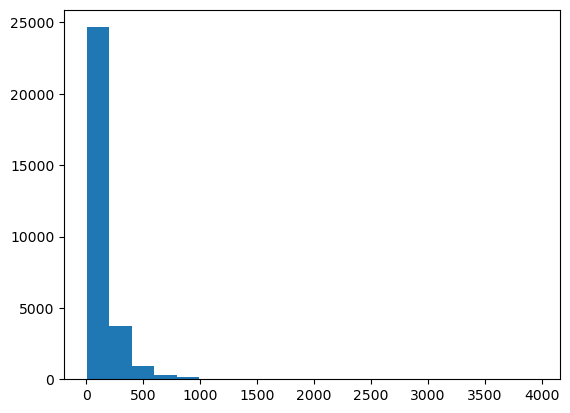

In [65]:
#What´s the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens,bins=20);

In [66]:
#How long of a sentence length cover 95% of examples?
output_seq_len=int(np.percentile(sent_lens,95))
output_seq_len

392

In [67]:
#Maximum sequence lenght in the training set
max(sent_lens)

3963

### Create a text vectorizer layer

-Tokenization:straight mapping from token to number can be modelled but quickly gets to big).

-Embedding:richer representation of relationships between tokens(can limit size + can be learned)

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit_transform(X_train[['Review_Text']].values.ravel())
len(vectorizer.get_feature_names_out()) #vectorizer.get_feature_names_out()

35734

In [69]:
#Create text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer=TextVectorization(max_tokens=45952, # number of words in vocabulary
                                  output_sequence_length=output_seq_len #desired output length of vectorized sequences 
                                  )

In [70]:
#Adapt text vectorizer to traning sentences
text_vectorizer.adapt(X_train[['Review_Text']].values.ravel())

In [71]:
#Test our text vectorize on random sentences
import random
target_sentence=random.choice(X_train[['Review_Text']].values.ravel())
print(f"Text:\n{target_sentence}")
print(f"\nLength of text:{len(target_sentence.split())}")
print(f"\nVectorized text: {text_vectorizer([target_sentence])}")

Text:
our family travels to disneyworld in florida 3 times a year for a week each trip. we love it and in wdw everything runs smoothly, even when lines do hit peak times. we were in la this january for business reasons and went to disneyland with my youngest (11) just because a. it is disney, b. it is an amusement park and c. we were in the area. well, let's say it is an under amusement park, the rides are almost the same as the ones we love in florida but with crappy surroundings, cranky and poorly dressed (time to buy new uniforms!) cast members, no music, no festive atmosphere. it barely feels disney, and it does not begin to feel  magical . as my daughter put it, she wanted to leave after 2 hours in the park (and the day we visited the lines were ok):  this is like what would look like if you were having a very bad dream about magic kingdom . i don't get how so many people still love disneyland, i honestly feel bad about them since they are obviously deprived of fun choices or seei

In [72]:
#How many words in our training vocabulary
df_disneyland_rating=text_vectorizer.get_vocabulary()
print(f"Number of words in vocab:{len(df_disneyland_rating)}")
print(f"Most common words in vocab:{df_disneyland_rating[:5]}")
print(f"Least common words in vocab:{df_disneyland_rating[-5:]}")

Number of words in vocab:45952
Most common words in vocab:['', '[UNK]', 'the', 'and', 'to']
Least common words in vocab:['feb2013', 'feb2012', 'feb2', 'featuresdisneyland', 'featuredthe']


In [73]:
#Get the config of our text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization_1',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 45952,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 392,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

### Create custom text embedding

In [74]:
#Create token embedding layer
token_embed=layers.Embedding(input_dim=len(df_disneyland_rating), #length of vocabulary
                             output_dim=128, #Note:different embedding sizes result in drastically different parameters to train
                             mask_zero=True, #use masking to handle variable sequence lengths (save space),
                             name='token_embedding')

In [75]:
#Show example embedding
print(f"Sentence before vectorization:\n {target_sentence}\n")
vectorized_sentence=text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n {vectorized_sentence}\n")
embedded_sentence=token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n {embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
 our family travels to disneyworld in florida 3 times a year for a week each trip. we love it and in wdw everything runs smoothly, even when lines do hit peak times. we were in la this january for business reasons and went to disneyland with my youngest (11) just because a. it is disney, b. it is an amusement park and c. we were in the area. well, let's say it is an under amusement park, the rides are almost the same as the ones we love in florida but with crappy surroundings, cranky and poorly dressed (time to buy new uniforms!) cast members, no music, no festive atmosphere. it barely feels disney, and it does not begin to feel  magical . as my daughter put it, she wanted to leave after 2 hours in the park (and the day we visited the lines were ok):  this is like what would look like if you were having a very bad dream about magic kingdom . i don't get how so many people still love disneyland, i honestly feel bad about them since they are obviously depri

## Creating datasets (making sure our datasets loads as fast as possible)

In [76]:
#Turn our data into TensorFlow Datasets
train_dataset=tf.data.Dataset.from_tensor_slices((X_train[['Review_Text']].values.ravel(),train_labels_one_hot))
test_dataset=tf.data.Dataset.from_tensor_slices((X_test[['Review_Text']].values.ravel(),test_labels_one_hot))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [77]:
#Take the TensorSliceDataset's and turn them into prefected datasets
train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## Model 2 : Conv1D with token embeddings

In [78]:
#Create 1D conv model to process sequences
inputs=layers.Input(shape=(1,),dtype=tf.string)
text_vectors=text_vectorizer(inputs) #vectorize text inputs
token_embeddings=token_embed(text_vectors) #create embedding
x=layers.Conv1D(64,kernel_size=5,padding='same',activation="relu")(token_embeddings)
x=layers.GlobalAveragePooling1D()(x) #condense he outputs of our feature vector from conv layer
outputs=layers.Dense(num_classes,activation='softmax')(x)
model_2=tf.keras.Model(inputs,outputs)

#Compile
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [79]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 392)              0         
 ectorization)                                                   
                                                                 
 token_embedding (Embedding)  (None, 392, 128)         5881856   
                                                                 
 conv1d_1 (Conv1D)           (None, 392, 64)           41024     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_16 (Dense)            (None, 5)                 325 

In [80]:
#Fit the model
history_model_2=model_2.fit(train_dataset,
                            steps_per_epoch=int(0.1*len(train_dataset)),
                            epochs=10,
                            validation_data=test_dataset,
                            validation_steps=int(0.1*len(test_dataset))) #only validate on 10% of the batches

Epoch 1/10
93/93 [==============================] - 16s 121ms/step - loss: 1.2313 - accuracy: 0.5454 - val_loss: 1.1793 - val_accuracy: 0.5336
Epoch 2/10
93/93 [==============================] - 10s 107ms/step - loss: 1.1581 - accuracy: 0.5430 - val_loss: 1.1248 - val_accuracy: 0.5484
Epoch 3/10
93/93 [==============================] - 10s 108ms/step - loss: 1.1005 - accuracy: 0.5417 - val_loss: 1.0596 - val_accuracy: 0.5742
Epoch 4/10
93/93 [==============================] - 11s 118ms/step - loss: 0.9962 - accuracy: 0.5813 - val_loss: 0.9844 - val_accuracy: 0.5727
Epoch 5/10
93/93 [==============================] - 11s 114ms/step - loss: 0.9785 - accuracy: 0.5877 - val_loss: 0.9625 - val_accuracy: 0.5836
Epoch 6/10
93/93 [==============================] - 11s 123ms/step - loss: 0.9544 - accuracy: 0.5864 - val_loss: 0.9518 - val_accuracy: 0.6016
Epoch 7/10
93/93 [==============================] - 10s 110ms/step - loss: 0.9374 - accuracy: 0.5995 - val_loss: 0.9407 - val_accuracy: 0.5867

In [81]:
#Evaluate on the whole validation dataset
model_2.evaluate(test_dataset,verbose=0)

[0.9214253425598145, 0.6159256100654602]

In [82]:
#Make predictions (our model predicts prediction probability for each class)
model_2_pred_probs=model_2.predict(test_dataset)

400/400 [==============================] - 9s 14ms/step


In [83]:
#Convert pred probs to classes
model_2_preds=tf.argmax(model_2_pred_probs,axis=1)
model_2_preds

<tf.Tensor: shape=(12797,), dtype=int64, numpy=array([4, 2, 4, ..., 3, 4, 4], dtype=int64)>

In [84]:
#Calculate model_2_results
model_2_results=calculate_results(test_labels_encoded,
                                  model_2_preds)
model_2_results

{'accuracy': 0.616, 'precision': 0.562, 'recall': 0.616, 'f1': 0.584}

# Recurrent Neural Networks (RNN's)

## Model 3: LSTM

In [85]:
#Create an LSTM model
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,) ,dtype='string')
x=text_vectorizer(inputs)
x=token_embed(x)
x=layers.LSTM(64,return_sequences=True)(x) #When you are stacking RNN cells together,you need to set return_sequences=True
x=layers.LSTM(64)(x)
x=layers.Dense(64,activation='relu')(x)
outputs=layers.Dense(num_classes,activation='softmax')(x)
model_3=tf.keras.Model(inputs,outputs,name='model_3_LSTM')

In [86]:
#Get a summary
model_3.summary()

Model: "model_3_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 392)              0         
 ectorization)                                                   
                                                                 
 token_embedding (Embedding)  (None, 392, 128)         5881856   
                                                                 
 lstm (LSTM)                 (None, 392, 64)           49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                      

In [87]:
#Compile the model
model_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

#Fit model_3 to the data
history_model_3=model_3.fit(train_dataset,
                            epochs=10,
                            steps_per_epoch=int(0.1*len(train_dataset)),
                            validation_data=test_dataset,
                            validation_steps=int(0.1*len(test_dataset)))

Epoch 1/10
93/93 [==============================] - 120s 1s/step - loss: 1.0631 - accuracy: 0.5645 - val_loss: 1.1547 - val_accuracy: 0.5641
Epoch 2/10
93/93 [==============================] - 93s 999ms/step - loss: 0.9565 - accuracy: 0.5914 - val_loss: 0.9808 - val_accuracy: 0.5836
Epoch 3/10
93/93 [==============================] - 94s 1s/step - loss: 0.9328 - accuracy: 0.5998 - val_loss: 0.9727 - val_accuracy: 0.5977
Epoch 4/10
93/93 [==============================] - 95s 1s/step - loss: 0.9008 - accuracy: 0.6122 - val_loss: 0.9491 - val_accuracy: 0.6039
Epoch 5/10
93/93 [==============================] - 96s 1s/step - loss: 0.9079 - accuracy: 0.6132 - val_loss: 1.0423 - val_accuracy: 0.6016
Epoch 6/10
93/93 [==============================] - 104s 1s/step - loss: 0.8858 - accuracy: 0.6226 - val_loss: 0.9368 - val_accuracy: 0.6070
Epoch 7/10
93/93 [==============================] - 105s 1s/step - loss: 0.8805 - accuracy: 0.6304 - val_loss: 0.9550 - val_accuracy: 0.6016
Epoch 8/10
93/

In [91]:
#Evaluate on the whole test dataset
model_3.evaluate(test_dataset)

400/400 [==============================] - 90s 217ms/step - loss: 0.9347 - accuracy: 0.5962


[0.9346691370010376, 0.5962334871292114]

In [92]:
#Make predictions (our model predicts prediction probability for each class)
model_3_pred_probs=model_3.predict(test_dataset)

400/400 [==============================] - 144s 334ms/step


In [93]:
#Convert pred probs to classes
model_3_preds=tf.argmax(model_3_pred_probs,axis=1)
model_3_preds

<tf.Tensor: shape=(12797,), dtype=int64, numpy=array([4, 3, 4, ..., 3, 4, 4], dtype=int64)>

In [94]:
#Calculate model_3_results
model_3_results=calculate_results(test_labels_encoded,
                                  model_3_preds)
model_3_results

{'accuracy': 0.596, 'precision': 0.541, 'recall': 0.596, 'f1': 0.566}

## Model 4 : GRU

In [95]:
#Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,) , dtype=tf.string)
x=text_vectorizer(inputs)
x=token_embed(x)
x=layers.GRU(128,return_sequences=True)(x)
x=layers.GRU(64,return_sequences=True)(x)
x=layers.Dense(32,activation='relu')(x)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(num_classes,activation='softmax')(x)
model_4=tf.keras.Model(inputs,outputs,name='model_4_GRU')

In [96]:
model_4.summary()

Model: "model_4_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 392)              0         
 ectorization)                                                   
                                                                 
 token_embedding (Embedding)  (None, 392, 128)         5881856   
                                                                 
 gru_2 (GRU)                 (None, 392, 128)          99072     
                                                                 
 gru_3 (GRU)                 (None, 392, 64)           37248     
                                                                 
 dense_21 (Dense)            (None, 392, 32)           2080      
                                                       

In [97]:
#Compile the model
model_4.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

#Fit model_4 to the data
history_model_4=model_4.fit(train_dataset,
                            epochs=10,
                            steps_per_epoch=int(0.1*len(train_dataset)),
                            validation_data=test_dataset,
                            validation_steps=int(0.1*len(test_dataset)))

Epoch 1/10
93/93 [==============================] - 129s 1s/step - loss: 1.0127 - accuracy: 0.5759 - val_loss: 1.0704 - val_accuracy: 0.5695
Epoch 2/10
93/93 [==============================] - 110s 1s/step - loss: 0.8739 - accuracy: 0.6169 - val_loss: 0.9440 - val_accuracy: 0.5883
Epoch 3/10
93/93 [==============================] - 101s 1s/step - loss: 0.8306 - accuracy: 0.6512 - val_loss: 0.9479 - val_accuracy: 0.5586
Epoch 4/10
93/93 [==============================] - 99s 1s/step - loss: 0.8029 - accuracy: 0.6515 - val_loss: 0.9290 - val_accuracy: 0.6141
Epoch 5/10
93/93 [==============================] - 101s 1s/step - loss: 0.8241 - accuracy: 0.6495 - val_loss: 0.9181 - val_accuracy: 0.6242
Epoch 6/10
93/93 [==============================] - 105s 1s/step - loss: 0.7844 - accuracy: 0.6640 - val_loss: 0.9438 - val_accuracy: 0.6219
Epoch 7/10
93/93 [==============================] - 105s 1s/step - loss: 0.7857 - accuracy: 0.6680 - val_loss: 0.9000 - val_accuracy: 0.6148
Epoch 8/10
93/

In [98]:
#Evaluate on the whole test dataset
model_4.evaluate(test_dataset)

400/400 [==============================] - 112s 273ms/step - loss: 0.9219 - accuracy: 0.6051


[0.9218870401382446, 0.6050636768341064]

In [99]:
#Make predictions (our model predicts prediction probability for each class)
model_4_pred_probs=model_4.predict(test_dataset)

400/400 [==============================] - 107s 241ms/step


In [100]:
#Convert pred probs to classes
model_4_preds=tf.argmax(model_4_pred_probs,axis=1)
model_4_preds

<tf.Tensor: shape=(12797,), dtype=int64, numpy=array([4, 2, 4, ..., 3, 4, 4], dtype=int64)>

In [101]:
#Calculate model_4_results
model_4_results=calculate_results(test_labels_encoded,
                                  model_4_preds)
model_4_results

{'accuracy': 0.605, 'precision': 0.603, 'recall': 0.605, 'f1': 0.596}

## Model 5 : Bidirectional RNN

In [102]:
#Build a bidirectional RNN in TensorFlow
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype='string')
x=text_vectorizer(inputs)
x=token_embed(x)
x=layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x=layers.Bidirectional(layers.GRU(64))(x)
outputs=layers.Dense(num_classes,activation='softmax')(x)
model_5=tf.keras.Model(inputs,outputs,name='model_5_bidirectional')

In [103]:
model_5.summary()

Model: "model_5_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 392)              0         
 ectorization)                                                   
                                                                 
 token_embedding (Embedding)  (None, 392, 128)         5881856   
                                                                 
 bidirectional (Bidirectiona  (None, 392, 128)         98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                             

In [104]:
#Compile the model
model_5.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

#Fit model_5 to the data
history_model_5=model_5.fit(train_dataset,
                            epochs=10,
                            steps_per_epoch=int(0.1*len(train_dataset)),
                            validation_data=test_dataset,
                            validation_steps=int(0.1*len(test_dataset)))

Epoch 1/10
93/93 [==============================] - 208s 2s/step - loss: 0.9411 - accuracy: 0.5998 - val_loss: 1.0176 - val_accuracy: 0.6109
Epoch 2/10
93/93 [==============================] - 153s 2s/step - loss: 0.8224 - accuracy: 0.6519 - val_loss: 0.9043 - val_accuracy: 0.5930
Epoch 3/10
93/93 [==============================] - 154s 2s/step - loss: 0.7793 - accuracy: 0.6741 - val_loss: 0.9733 - val_accuracy: 0.5648
Epoch 4/10
93/93 [==============================] - 153s 2s/step - loss: 0.7501 - accuracy: 0.6801 - val_loss: 1.0129 - val_accuracy: 0.5664
Epoch 5/10
93/93 [==============================] - 155s 2s/step - loss: 0.7781 - accuracy: 0.6727 - val_loss: 1.0011 - val_accuracy: 0.6047
Epoch 6/10
93/93 [==============================] - 162s 2s/step - loss: 0.7102 - accuracy: 0.7110 - val_loss: 1.0230 - val_accuracy: 0.5945
Epoch 7/10
93/93 [==============================] - 165s 2s/step - loss: 0.7381 - accuracy: 0.6915 - val_loss: 0.9554 - val_accuracy: 0.6133
Epoch 8/10
93

In [105]:
#Evaluate on the whole test dataset
model_5.evaluate(test_dataset)

400/400 [==============================] - 178s 437ms/step - loss: 0.9111 - accuracy: 0.6118


[0.9110777378082275, 0.611784040927887]

In [106]:
#Make predictions (our model predicts prediction probability for each class)
model_5_pred_probs=model_5.predict(test_dataset)

400/400 [==============================] - 190s 433ms/step


In [108]:
#Convert pred probs to classes
model_5_preds=tf.argmax(model_5_pred_probs,axis=1)
model_5_preds

<tf.Tensor: shape=(12797,), dtype=int64, numpy=array([4, 2, 4, ..., 3, 4, 4], dtype=int64)>

In [109]:
#Calculate model_5_results
model_5_results=calculate_results(test_labels_encoded,
                                  model_5_preds)
model_5_results

{'accuracy': 0.612, 'precision': 0.596, 'recall': 0.612, 'f1': 0.6}

## Model 6 : Feature Extraction with pretrained token embeddings

In [110]:
#Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                      trainable=False,
                                      name='universal_sentence_encoder')

In [111]:
#Test out the pretrained embedding on a random sentence
random_train_sentence=random.choice(X_train[['Review_Text']].values.ravel())
print(f"Random sentence:\n {random_train_sentence}")
use_embedded_sentence=tf_hub_embedding_layer([random_train_sentence])
print(f"Sentence after embedding:\n {use_embedded_sentence[0]}")
print(f"Length of sentence embedding: {len(use_embedded_sentence[0])}")

Random sentence:
 overcrowded and maybe you get to ride on two or three things whilst queuing for hours get there really early and try and beat the crowds however it won't be for longthey let far to many people in its a real jokespend the money and go to the original in orange county usamuch much better
Sentence after embedding:
 [-7.93035794e-03 -9.15635601e-02  3.83432880e-02  1.97584331e-02
 -2.08316166e-02 -2.56006159e-02 -3.97531241e-02 -4.34964374e-02
  3.70607823e-02 -8.93665627e-02  2.56142183e-03 -1.93793066e-02
  8.59527215e-02  4.66641970e-02 -3.68602350e-02  2.00735908e-02
 -4.02645618e-02 -3.15539986e-02  1.74239986e-02 -3.44208675e-04
 -1.69240215e-04 -1.05158973e-03 -3.20249125e-02  5.11063449e-02
  9.63022187e-03  4.79825735e-02 -3.11378241e-02 -4.44474537e-03
 -1.03261983e-02 -1.62284356e-02  2.81267874e-02 -7.18465671e-02
  7.00646415e-02  6.27232566e-02  7.34508932e-02 -4.17794148e-03
  5.83949387e-02  1.11865904e-02 -4.00741808e-02 -2.41098534e-02
 -2.57010944e-02  

### Building and fitting an NLP feature extraction model using pretrained embeddings from TensorFlow Hub

In [112]:
#Define feature extraction model using TF Hub Layer
inputs=layers.Input(shape=[],dtype=tf.string)
pretrained_embedding=tf_hub_embedding_layer(inputs) #tokenize text and create embedding of each sequence (512 long vector)
x=layers.Dense(128,activation="relu")(pretrained_embedding)
#Note: you could add more layers here if you wanted to
outputs=layers.Dense(num_classes,activation='softmax')(x) #create the output layer
model_6=tf.keras.Model(inputs=inputs,
                       outputs=outputs,
                       name='model_2_USE_feature_extractor')

#Compile the model
model_6.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [113]:
model_6.summary()

Model: "model_2_USE_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_24 (Dense)            (None, 128)               65664     
                                                                 
 dense_25 (Dense)            (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [114]:
#Fit model_6 to the data
history_model_6=model_6.fit(train_dataset,
                            epochs=10,
                            steps_per_epoch=int(0.1*len(train_dataset)),
                            validation_data=test_dataset,
                            validation_steps=int(0.1*len(test_dataset)))

Epoch 1/10
93/93 [==============================] - 21s 117ms/step - loss: 1.1942 - accuracy: 0.5417 - val_loss: 1.0715 - val_accuracy: 0.5359
Epoch 2/10
93/93 [==============================] - 10s 106ms/step - loss: 1.0188 - accuracy: 0.5709 - val_loss: 0.9770 - val_accuracy: 0.5906
Epoch 3/10
93/93 [==============================] - 7s 76ms/step - loss: 0.9740 - accuracy: 0.5679 - val_loss: 0.9351 - val_accuracy: 0.5992
Epoch 4/10
93/93 [==============================] - 7s 71ms/step - loss: 0.9310 - accuracy: 0.5917 - val_loss: 0.9165 - val_accuracy: 0.6078
Epoch 5/10
93/93 [==============================] - 6s 70ms/step - loss: 0.9334 - accuracy: 0.5843 - val_loss: 0.9064 - val_accuracy: 0.6117
Epoch 6/10
93/93 [==============================] - 7s 73ms/step - loss: 0.9196 - accuracy: 0.6015 - val_loss: 0.8961 - val_accuracy: 0.6023
Epoch 7/10
93/93 [==============================] - 7s 72ms/step - loss: 0.8897 - accuracy: 0.6099 - val_loss: 0.8918 - val_accuracy: 0.6070
Epoch 8/1

In [115]:
#Evaluate on the whole test dataset
model_6.evaluate(test_dataset)

400/400 [==============================] - 20s 51ms/step - loss: 0.8886 - accuracy: 0.6061


[0.8886184692382812, 0.6060795783996582]

In [116]:
#Make predictions (our model predicts prediction probability for each class)
model_6_pred_probs=model_6.predict(test_dataset)

400/400 [==============================] - 25s 50ms/step


In [117]:
#Convert pred probs to classes
model_6_preds=tf.argmax(model_6_pred_probs,axis=1)
model_6_preds

<tf.Tensor: shape=(12797,), dtype=int64, numpy=array([4, 2, 4, ..., 3, 4, 4], dtype=int64)>

In [118]:
#Calculate model_6_results

model_6_results=calculate_results(test_labels_encoded,
                                  model_6_preds)
model_6_results

{'accuracy': 0.606, 'precision': 0.583, 'recall': 0.606, 'f1': 0.587}

## Model 7: Combining pretrained token embeddings + characters embeddings (hybrid embedding layer)

### Creating a character-level tokenizer

In [119]:
X_train[['Review_Text']].values.ravel()[:1]

array(['lots of fun attractions, short ride waits, easy mtr acess, food and drink is very expensive. a good day for young and old.'],
      dtype=object)

In [120]:
#Making a function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

In [121]:
#Text splitting non-character-level sequence into characters
random_train_sentence=random.choice(X_train[['Review_Text']].values.ravel())
split_chars(random_train_sentence)

'q u e u e s   w e r e   h o r r e n d o u s ,   q u i t e   a   f e w   r i d e s   w e r e   c l o s e d ,   f o o d   w a s   h o r r e n d o u s   a n d   v   e x p e n s i v e .   a l l   i n   a l l ,   n o t   a   g o o d   d a y !'

In [122]:
#Split sequence-level data splits into character-level data splits
train_chars=[split_chars(sentence) for sentence in X_train[['Review_Text']].values.ravel()]
test_chars=[split_chars(sentence) for sentence in X_test[['Review_Text']].values.ravel()]
print(train_chars[:2])

['l o t s   o f   f u n   a t t r a c t i o n s ,   s h o r t   r i d e   w a i t s ,   e a s y   m t r   a c e s s ,   f o o d   a n d   d r i n k   i s   v e r y   e x p e n s i v e .   a   g o o d   d a y   f o r   y o u n g   a n d   o l d .', 'i   w a s   v e r y   s u r p r i s e d   t h a t   e u r o   d i s n e y   d i d   n o t   h a v e   t h a t     h a p p i e s t   p l a c e   o n   e a r t h     f e e l !   t h e   d i s n e y   s t a f f   w e r e   n o t   f r i e n d l y   ( l i k e   i   a m   u s e d   t o   i n   u s ) ,   i t   w a s   n o t   c l e a n   l i k e   t h e   u s   p a r k s   ( g a r b a g e   a n d   c i g a r e t t e   b u t t s   a l l   o v e r ) ,   a n d   w e   o n l y   s a w   t h r e e   c h a r a c t e r s   d u r i n g   o u r   3   d a y s   t h e r e .   i t   i s   w o r t h   v i s i t i n g   j u s t   t o   e x p e r i e n c e   a n d   t o   s e e   h o w   a m a z i n g   o u r   p a r k s   a r e   i n   t h e   u s ;   i t   g a

In [123]:
#What´s the average character length?
chars_lens=[len(sentence) for sentence in X_train[['Review_Text']].values.ravel()]
mean_char_len=np.mean(chars_lens)
mean_char_len

695.4394989785325

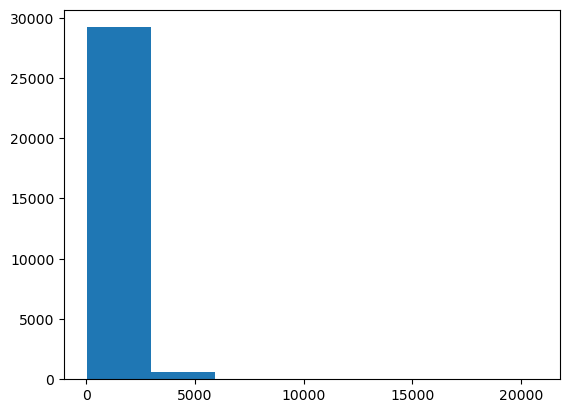

In [124]:
#Check the distribution of our sequences at a character-level
import matplotlib.pyplot as plt
plt.hist(chars_lens,bins=7);

In [125]:
#Find wha character length covers 95% of sequences
output_seq_char_len=int(np.percentile(chars_lens,95))
output_seq_char_len

2102

In [126]:
#Get all keyboard characters
import string
alphabet=string.ascii_lowercase+string.digits+string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [127]:
#Create char-level vectorizer instance
num_char_tokens=len(alphabet)+2 #add 2 for space and OOV token (OOV=out of vocab,'[UNK]')
char_vectorizer=TextVectorization(max_tokens=num_char_tokens,
                                  # standardize=None, #set standarization to "None" if you want to leave punctuation in
                                  output_sequence_length=output_seq_char_len,
                                  name='char_vectorizer')

In [128]:
#Adapt character vectorizer to training character
char_vectorizer.adapt(train_chars)

In [129]:
#Check character vocab stats
char_vocab=char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}") 
print(f"5 most common characters:{char_vocab[:5]}")
print(f"5 least common characters:{char_vocab[-5:]}")

Number of different characters in character vocab: 38
5 most common characters:['', '[UNK]', 'e', 't', 'a']
5 least common characters:['4', '6', '9', '8', '7']


In [130]:
#Test out our character vectorizer
random_train_chars=random.choice(train_chars)
print(f"Charified text:\n {random_train_chars}")
print(f"\nLength of random_train_chars:{len(random_train_chars.split())}")
vectorized_chars=char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n {vectorized_chars}")
print(f"\nLength of vectorized chars:{len(vectorized_chars[0])}")

Charified text:
 m y   f a m i l y   j u s t   c o m p l e t e d   o u r   t h i r d   t r i p   t o   d i s n e y l a n d   a n d   c a l i f o r n i a   a d v e n t u r e   p a r k .   t h e r e   i s   s o m e t h i n g   m a g i c a l   a b o u t   c h r i s t m a s   i n   t h e   p a r k s .   f r o m   t h e   h u g e   t r e e   o n   m a i n   s t r e e t   u s a   t o   s l e e p i n g   b e a u t y   c a s t l e   b a t h e d   i n   a   g l i t t e r i n g   s e a   o f   l i g h t s ,   i t   i s   b r e a t h t a k i n g . i n   a d d i t i o n   t o   t h e   u s u a l   r i d e s   t h i s   y e a r ,   w e   h a d   a   c h a n c e   t o   v i s i t   t h e   m a j o r   u p g r a d e s   i n   t h e   c a l i f o r n i a   a d v e n t u r e   p a r k .   t h e s e   i n c l u d e d   b u e n a   v i s t a   s t r e e t ,   w h i c h   i s   a   t h r o w b a c k   t o   t h e   t i m e   w h e n   w a l t   d i s n e y   a r r i v e d   i n   c a l i f o r n i a   w i

### Creating a character-level embedding

In [131]:
#Create char embedding layer
char_embed=layers.Embedding(input_dim=len(char_vocab), #number of different characters
                            output_dim=30, 
                            mask_zero=True,
                            name='char_embed')

In [132]:
#Test our character embedding layer
print(f"Charified text:\n {random_train_chars}\n")
char_embed_example=char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n {char_embed_example}\n")
print(f"Character embedding shape:{char_embed_example.shape}")

Charified text:
 m y   f a m i l y   j u s t   c o m p l e t e d   o u r   t h i r d   t r i p   t o   d i s n e y l a n d   a n d   c a l i f o r n i a   a d v e n t u r e   p a r k .   t h e r e   i s   s o m e t h i n g   m a g i c a l   a b o u t   c h r i s t m a s   i n   t h e   p a r k s .   f r o m   t h e   h u g e   t r e e   o n   m a i n   s t r e e t   u s a   t o   s l e e p i n g   b e a u t y   c a s t l e   b a t h e d   i n   a   g l i t t e r i n g   s e a   o f   l i g h t s ,   i t   i s   b r e a t h t a k i n g . i n   a d d i t i o n   t o   t h e   u s u a l   r i d e s   t h i s   y e a r ,   w e   h a d   a   c h a n c e   t o   v i s i t   t h e   m a j o r   u p g r a d e s   i n   t h e   c a l i f o r n i a   a d v e n t u r e   p a r k .   t h e s e   i n c l u d e d   b u e n a   v i s t a   s t r e e t ,   w h i c h   i s   a   t h r o w b a c k   t o   t h e   t i m e   w h e n   w a l t   d i s n e y   a r r i v e d   i n   c a l i f o r n i a   w i

In [133]:
#1. Set-up token inputs/model
token_inputs=layers.Input(shape=[],dtype=tf.string , name='token_input')
token_embeddings=tf_hub_embedding_layer(token_inputs)
token_outputs=layers.Dense(128,activation='relu')(token_embeddings)
token_model=tf.keras.Model(inputs=token_inputs,
                           outputs=token_outputs)

#2. Set-up char inputs/model
char_inputs=layers.Input(shape=(1,),dtype=tf.string,name='char_input')
char_vectors=char_vectorizer(char_inputs)
char_embeddings=char_embed(char_vectors)
char_bi_lstm=layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model=tf.keras.Model(inputs=char_inputs,
                          outputs=char_bi_lstm)

#3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat=layers.Concatenate(name='token_char_hybrid')([token_model.output,
                                                                char_model.output])

#4. Create output layers - adding a Dropout layer
combined_dropout=layers.Dropout(0.1) (token_char_concat)
combined_dense=layers.Dense(128,activation='relu')(combined_dropout)
output_layer=layers.Dense(num_classes,activation='softmax')(combined_dense)

#5. Construct model with char and token inputs
model_7=tf.keras.Model(inputs=[token_model.input,char_model.input],
                       outputs=output_layer,
                       name='model_7_token_and_char_embeddings')

In [134]:
#Get a summary of our model
model_7.summary()

Model: "model_7_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 2102)        0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   [

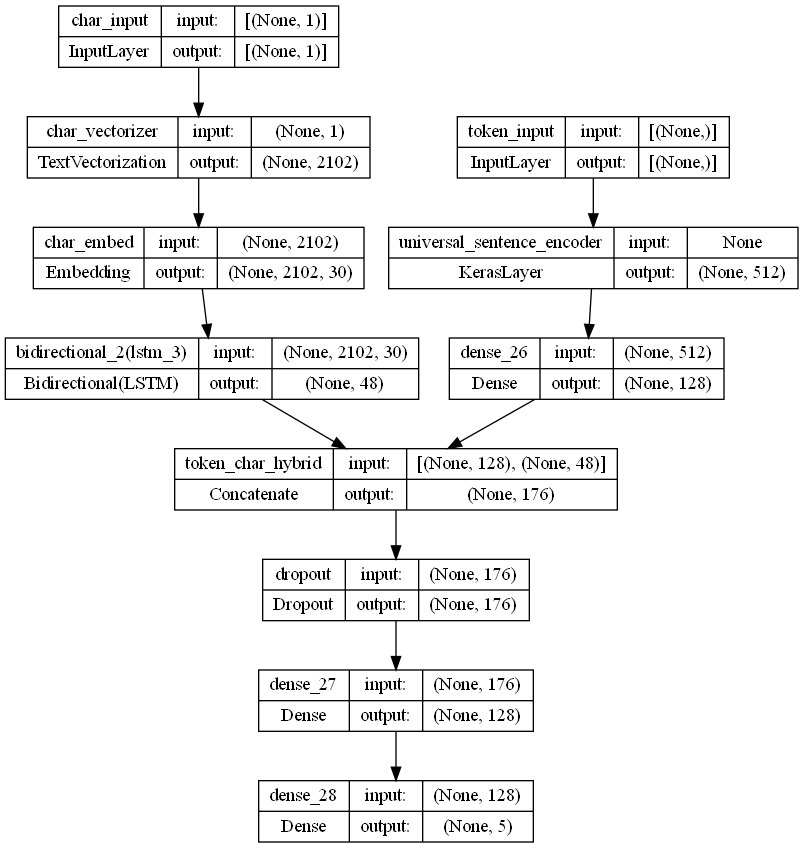

In [135]:
#Plot hybrid token and character model
from keras.utils import plot_model
plot_model(model_7,show_shapes=True)

In [136]:
#Compile token char model
model_7.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

### Combining token and character data into a tf.data.Dataset

In [138]:
# Combine chars and tokens into a dataset
train_char_token_data=tf.data.Dataset.from_tensor_slices((X_train[['Review_Text']].values.ravel(),train_chars)) #make data
train_char_token_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot) #make the labels
train_char_token_dataset=tf.data.Dataset.zip((train_char_token_data,train_char_token_labels))

#Prefetch and batch train data
train_char_token_dataset=train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [140]:
#Repeat the steps above in the for test data
test_char_token_data=tf.data.Dataset.from_tensor_slices((X_test[['Review_Text']].values.ravel(),test_chars)) #make data
test_char_token_labels=tf.data.Dataset.from_tensor_slices(test_labels_one_hot) #make the labels
test_char_token_dataset=tf.data.Dataset.zip((test_char_token_data,test_char_token_labels))
test_char_token_dataset=test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [141]:
#Check out our training and token embedding dataset
train_char_token_dataset,test_char_token_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [142]:
#Fit the model on tokens and chars
model_7_history=model_7.fit(train_char_token_dataset,
                            steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                            epochs=10,
                            validation_data=test_char_token_dataset,
                            validation_steps=int(0.1*len(test_char_token_dataset)))

Epoch 1/10
93/93 [==============================] - 263s 3s/step - loss: 1.1561 - accuracy: 0.5430 - val_loss: 1.0110 - val_accuracy: 0.5500
Epoch 2/10
93/93 [==============================] - 232s 3s/step - loss: 0.9666 - accuracy: 0.5783 - val_loss: 0.9177 - val_accuracy: 0.5906
Epoch 3/10
93/93 [==============================] - 232s 2s/step - loss: 0.9315 - accuracy: 0.5894 - val_loss: 0.9001 - val_accuracy: 0.5961
Epoch 4/10
93/93 [==============================] - 231s 2s/step - loss: 0.9129 - accuracy: 0.5911 - val_loss: 0.8936 - val_accuracy: 0.6117
Epoch 5/10
93/93 [==============================] - 180s 2s/step - loss: 0.9133 - accuracy: 0.6095 - val_loss: 0.8820 - val_accuracy: 0.6117
Epoch 6/10
93/93 [==============================] - 233s 3s/step - loss: 0.9111 - accuracy: 0.6005 - val_loss: 0.8790 - val_accuracy: 0.6242
Epoch 7/10
93/93 [==============================] - 233s 3s/step - loss: 0.8815 - accuracy: 0.6106 - val_loss: 0.8987 - val_accuracy: 0.6211
Epoch 8/10
93

In [143]:
#Evaluate on the whole validation dataset
model_7.evaluate(test_char_token_dataset)

400/400 [==============================] - 165s 403ms/step - loss: 0.8942 - accuracy: 0.6001


[0.8941875696182251, 0.6000624895095825]

In [144]:
#Make predictions with character model only
model_7_pred_probs=model_7.predict(test_char_token_dataset)
model_7_pred_probs

400/400 [==============================] - 172s 402ms/step


array([[2.5636915e-04, 1.7028858e-03, 3.1578984e-02, 2.8333762e-01,
        6.8312418e-01],
       [2.0204963e-01, 2.4748676e-01, 3.2172620e-01, 1.8195884e-01,
        4.6778630e-02],
       [6.1256285e-03, 1.8470185e-02, 1.0912740e-01, 3.3412096e-01,
        5.3215587e-01],
       ...,
       [5.2400869e-03, 2.5451720e-02, 2.2229794e-01, 5.2437413e-01,
        2.2263616e-01],
       [6.7870191e-05, 4.2676082e-04, 1.4710832e-02, 2.6476669e-01,
        7.2002786e-01],
       [1.6814636e-05, 7.8682344e-05, 3.2242320e-03, 1.1103802e-01,
        8.8564217e-01]], dtype=float32)

In [145]:
#Convert predictions probabilities to class labels
model_7_preds=tf.argmax(model_7_pred_probs,axis=1)
model_7_preds

<tf.Tensor: shape=(12797,), dtype=int64, numpy=array([4, 2, 4, ..., 3, 4, 4], dtype=int64)>

In [146]:
#Calculate the results of token-char-hybrid model
model_7_results=calculate_results(y_true=test_labels_encoded,
                                  y_pred=model_7_preds)

model_7_results

{'accuracy': 0.6, 'precision': 0.601, 'recall': 0.6, 'f1': 0.596}

# Modelling experiments with "Review_Text" and "Branch" as inputs

In [150]:
df.head()

,Rating,Review_Text,Branch
0,3,if you've ever been to disneyland anywhere you...,Disneyland_HongKong
1,3,its been a while since d last time we visit hk...,Disneyland_HongKong
2,3,thanks god it wasn t too hot or too humid wh...,Disneyland_HongKong
3,3,hk disneyland is a great compact park. unfortu...,Disneyland_HongKong
4,3,"the location is not in the city, took around 1...",Disneyland_HongKong


### Create position embeddings

In [151]:
#How many brances do we have?
df["Branch"].value_counts()

Disneyland_California    19406
Disneyland_Paris         13630
Disneyland_HongKong       9620
Name: Branch, dtype: int64

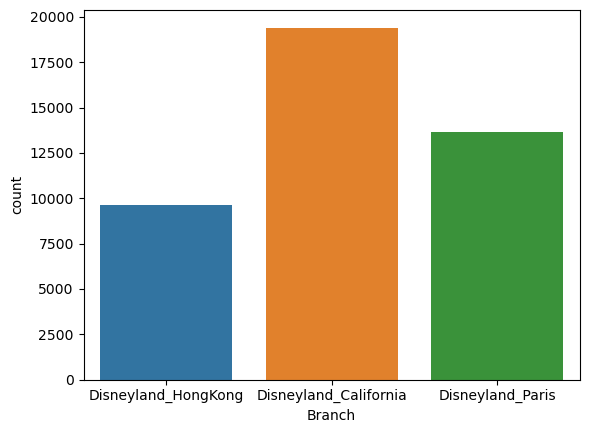

In [152]:
#Plotting the distributions of the Branches
import seaborn as sns
sns.countplot(data=df,x='Branch');

In [172]:
#Converting the "Branch" column to numbers before creating one_hot_tensors
from sklearn.preprocessing import LabelEncoder
import pandas as pd
label_encoder=LabelEncoder()
train_branch_encoded=pd.DataFrame(label_encoder.fit_transform(X_train['Branch']),columns=["Branches"])
test_branch_encoded=pd.DataFrame(label_encoder.transform(X_test['Branch']),columns=["Branches"])

#Check what training labels look like
train_branch_encoded.head()

,Branches
0,1
1,2
2,1
3,1
4,0


In [221]:
#Use TensorFlow to create one-hot-encoded tensors of our "Branch" column
train_branch_numbers_one_hot=tf.squeeze(tf.one_hot(train_branch_encoded, depth=3))
test_branch_numbers_one_hot=tf.squeeze(tf.one_hot(test_branch_encoded, depth=3))
train_branch_numbers_one_hot[:2], train_branch_numbers_one_hot.shape

(<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[0., 1., 0.],
        [0., 0., 1.]], dtype=float32)>,
 TensorShape([29859, 3]))

In [159]:
X_train['Branch'].to_numpy()

array(['Disneyland_HongKong', 'Disneyland_Paris', 'Disneyland_HongKong',
       ..., 'Disneyland_California', 'Disneyland_HongKong',
       'Disneyland_HongKong'], dtype=object)

## Model 8: Combining pretrained token embeddings + the "Branch" one hot data

In [253]:
#1. Token inputs
token_inputs=layers.Input(shape=[] ,dtype='string' ,name='token_inputs')
token_embeddings=tf_hub_embedding_layer(token_inputs)
token_outputs=layers.Dense(128,activation='relu')(token_embeddings)
token_model=tf.keras.Model(inputs=token_inputs,
                           outputs=token_outputs)

# 2. Branch numbers model
branch_numbers_inputs=layers.Input(shape=(3,) ,dtype=tf.float32 ,name='branch_number_input')
x=layers.Dense(32,activation='relu')(branch_numbers_inputs)
branch_number_model=tf.keras.Model(inputs=branch_numbers_inputs,
                                 outputs=x)

# 3. Combine token and char embedding to a hybrid embeddding
combined_embeddings=layers.Concatenate(name='char_token_hybrid_embeddings')([token_model.output,branch_number_model.output])


output_layer=layers.Dense(num_classes,activation='softmax',name='output_layer')(combined_embeddings)


# 4. Put together model with all kind of inputs
model_8=tf.keras.Model(inputs=[token_model.input,
                               branch_number_model.input],
                       outputs=output_layer,
                       name='model_8_token_embedding_branch_model')

In [254]:
#Get a summary of our tribid embedding model
model_8.summary()

Model: "model_8_token_embedding_branch_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_inputs[0][0]']           
 rasLayer)                                                                                        
                                                                                                  
 branch_number_input (InputLaye  [(None, 3)]         0           []                               
 r)                                                                                               
                                                               

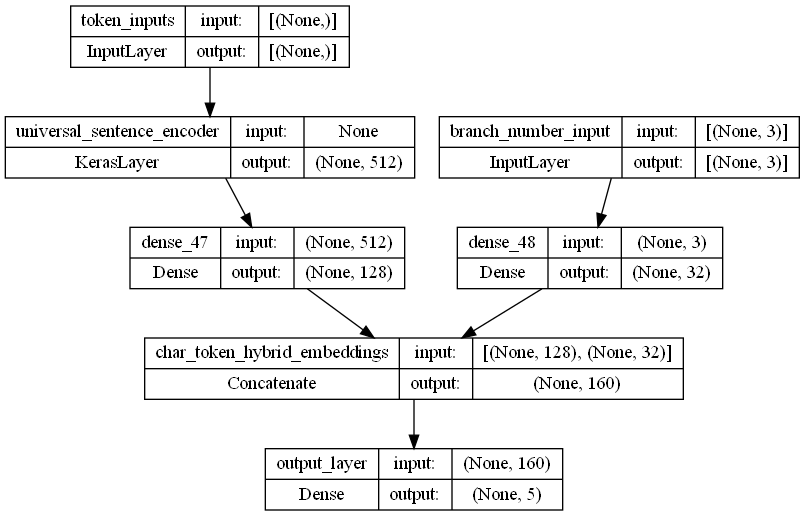

In [255]:
#Plot model_8 to explore it visually...
from tensorflow.keras.utils import plot_model
plot_model(model_8,show_shapes=True)

In [225]:
# Compile token,char and positional embedding model
model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), #helps to prevent overfitting
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

### Create hybrid embedding datasets using tf.data

In [227]:
#Create training and validation datasets(with all four kind of input data)

train_char_token_pos_data=tf.data.Dataset.from_tensor_slices((X_train[['Review_Text']].values.ravel(),
                                                             train_branch_numbers_one_hot))

train_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)


train_char_token_pos_dataset=tf.data.Dataset.zip((train_char_token_pos_data,train_char_token_pos_labels))

train_char_token_pos_dataset=train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

#The same for test data

test_char_token_pos_data=tf.data.Dataset.from_tensor_slices((X_test[['Review_Text']].values.ravel(),
                                                             test_branch_numbers_one_hot))

test_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(test_labels_one_hot)


test_char_token_pos_dataset=tf.data.Dataset.zip((test_char_token_pos_data,test_char_token_pos_labels))

test_char_token_pos_dataset=test_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [228]:
#Check input shapes
test_char_token_pos_dataset,test_char_token_pos_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

### Fitting, evaluating and making predictions with our hybrid model

In [230]:
#Fit our tribrid embedding modeel
history_model_8=model_8.fit(train_char_token_pos_dataset,
                            steps_per_epoch=int(0.1*len(train_char_token_pos_dataset)),
                            epochs=10,
                            validation_data=test_char_token_pos_dataset,
                            validation_steps=int(0.1*len(test_char_token_pos_dataset)))

Epoch 1/10
93/93 [==============================] - 10s 70ms/step - loss: 1.2097 - accuracy: 0.5998 - val_loss: 1.2157 - val_accuracy: 0.5859
Epoch 2/10
93/93 [==============================] - 6s 69ms/step - loss: 1.2046 - accuracy: 0.6035 - val_loss: 1.2024 - val_accuracy: 0.5969
Epoch 3/10
93/93 [==============================] - 7s 73ms/step - loss: 1.2135 - accuracy: 0.5786 - val_loss: 1.2000 - val_accuracy: 0.6031
Epoch 4/10
93/93 [==============================] - 7s 71ms/step - loss: 1.2005 - accuracy: 0.5964 - val_loss: 1.1954 - val_accuracy: 0.6055
Epoch 5/10
93/93 [==============================] - 7s 70ms/step - loss: 1.2045 - accuracy: 0.5944 - val_loss: 1.1928 - val_accuracy: 0.6078
Epoch 6/10
93/93 [==============================] - 7s 72ms/step - loss: 1.1994 - accuracy: 0.6045 - val_loss: 1.1877 - val_accuracy: 0.6016
Epoch 7/10
93/93 [==============================] - 7s 71ms/step - loss: 1.1850 - accuracy: 0.6038 - val_loss: 1.1888 - val_accuracy: 0.6109
Epoch 8/10
9

In [234]:
#Make predictions with the char token model
model_8_preds_probs=model_8.predict(test_char_token_pos_dataset,verbose=0)
model_8_preds_probs

array([[0.03736332, 0.04499893, 0.08368365, 0.2780705 , 0.5558835 ],
       [0.19356428, 0.17273429, 0.27339238, 0.23707186, 0.12323735],
       [0.08352367, 0.06412967, 0.12619415, 0.2608469 , 0.4653055 ],
       ...,
       [0.04812292, 0.0629103 , 0.19023946, 0.48010683, 0.21862046],
       [0.02994322, 0.02702261, 0.06208876, 0.26799974, 0.6129456 ],
       [0.03592416, 0.02569253, 0.03177976, 0.14141141, 0.7651921 ]],
      dtype=float32)

In [235]:
#Convert pred probs to pred labels
model_8_preds=tf.argmax(model_8_preds_probs,axis=1)
model_8_preds

<tf.Tensor: shape=(12797,), dtype=int64, numpy=array([4, 2, 4, ..., 3, 4, 4], dtype=int64)>

In [236]:
#Calculate results of char token pos model
model_8_results=calculate_results(test_labels_encoded,
                                  model_8_preds)

model_8_results

{'accuracy': 0.613, 'precision': 0.596, 'recall': 0.613, 'f1': 0.59}

## Model 9: Combining character embeddings + the "Branch" one hot data

In [256]:
# 1. Char inputs
char_inputs=layers.Input(shape=(1,) ,dtype='string',name='char_inputs')
char_vectors=char_vectorizer(char_inputs)
char_embeddings=char_embed(char_vectors)
char_bi_lstm=layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model=tf.keras.Model(inputs=char_inputs,
                          outputs=char_bi_lstm)

# 2. Branch numbers model
branch_numbers_inputs=layers.Input(shape=(3,) ,dtype=tf.float32 ,name='branch_number_input')
x=layers.Dense(32,activation='relu')(branch_numbers_inputs)
branch_number_model=tf.keras.Model(inputs=branch_numbers_inputs,
                                 outputs=x)

# 3. Combine token and char embedding to a hybrid embeddding
combined_embeddings=layers.Concatenate(name='char_token_hybrid_embeddings')([char_model.output,branch_number_model.output])


output_layer=layers.Dense(num_classes,activation='softmax',name='output_layer')(combined_embeddings)


# 4. Put together model with all kind of inputs
model_9=tf.keras.Model(inputs=[char_model.input,
                               branch_number_model.input],
                       outputs=output_layer,
                       name='model_9_char_embedding_branch_model')

In [257]:
#Get a summary of our hybrid embedding model
model_9.summary()

Model: "model_9_char_embedding_branch_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 2102)        0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 char_embed (Embedding)         (None, 2102, 30)     1140        ['char_vectorizer[3][0]']        
                                                                                                  
 branch_number_input (InputLaye  [(None, 3)]         0          

### Create hybrid embedding datasets using tf.data

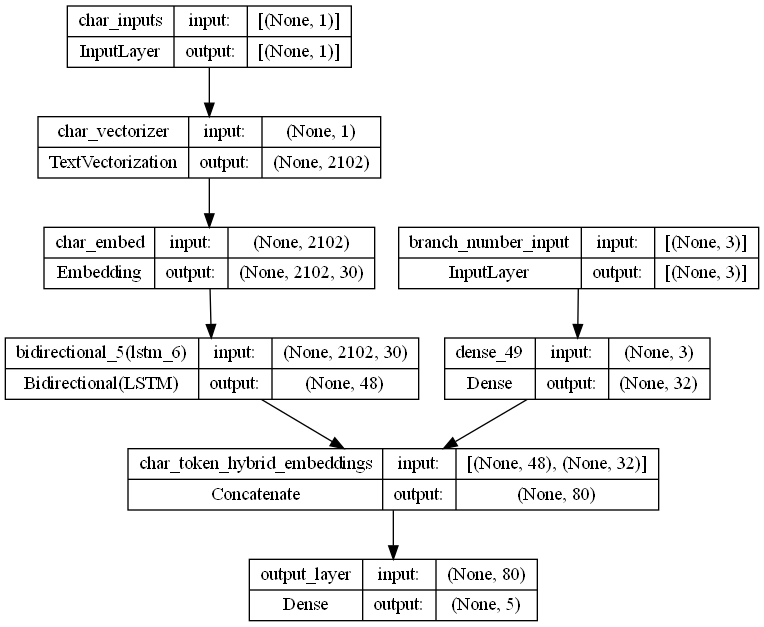

In [258]:
#Plot model_9 to explore it visually...
from tensorflow.keras.utils import plot_model
plot_model(model_9,show_shapes=True)

In [242]:
# Compile token,char and positional embedding model
model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), #helps to prevent overfitting
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

### Create hybrid embedding datasets using tf.data

In [243]:
#Create training and validation datasets(with all four kind of input data)

train_char_token_pos_data=tf.data.Dataset.from_tensor_slices((train_chars,
                                                             train_branch_numbers_one_hot))

train_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)


train_char_token_pos_dataset=tf.data.Dataset.zip((train_char_token_pos_data,train_char_token_pos_labels))

train_char_token_pos_dataset=train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

#The same for test data

test_char_token_pos_data=tf.data.Dataset.from_tensor_slices((test_chars,
                                                             test_branch_numbers_one_hot))

test_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(test_labels_one_hot)


test_char_token_pos_dataset=tf.data.Dataset.zip((test_char_token_pos_data,test_char_token_pos_labels))

test_char_token_pos_dataset=test_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

### Fitting, evaluating and making predictions with our hybrid model

In [244]:
#Fit our tribrid embedding modeel
history_model_9=model_9.fit(train_char_token_pos_dataset,
                            steps_per_epoch=int(0.1*len(train_char_token_pos_dataset)),
                            epochs=10,
                            validation_data=test_char_token_pos_dataset,
                            validation_steps=int(0.1*len(test_char_token_pos_dataset)))

Epoch 1/10
93/93 [==============================] - 261s 3s/step - loss: 1.3770 - accuracy: 0.5329 - val_loss: 1.3495 - val_accuracy: 0.5336
Epoch 2/10
93/93 [==============================] - 228s 2s/step - loss: 1.3424 - accuracy: 0.5417 - val_loss: 1.3409 - val_accuracy: 0.5336
Epoch 3/10
93/93 [==============================] - 229s 2s/step - loss: 1.3471 - accuracy: 0.5302 - val_loss: 1.3393 - val_accuracy: 0.5336
Epoch 4/10
93/93 [==============================] - 229s 2s/step - loss: 1.3371 - accuracy: 0.5407 - val_loss: 1.3376 - val_accuracy: 0.5336
Epoch 5/10
93/93 [==============================] - 229s 2s/step - loss: 1.3459 - accuracy: 0.5309 - val_loss: 1.3371 - val_accuracy: 0.5359
Epoch 6/10
93/93 [==============================] - 230s 2s/step - loss: 1.3280 - accuracy: 0.5517 - val_loss: 1.3327 - val_accuracy: 0.5352
Epoch 7/10
93/93 [==============================] - 231s 2s/step - loss: 1.3294 - accuracy: 0.5437 - val_loss: 1.3327 - val_accuracy: 0.5352
Epoch 8/10
93

In [250]:
#Make predictions with the char token model
model_9_preds_probs=model_9.predict(test_char_token_pos_dataset,verbose=0)
model_9_preds_probs

array([[0.06856881, 0.08622574, 0.17672044, 0.3122604 , 0.3562246 ],
       [0.11253387, 0.12280151, 0.19431141, 0.2621074 , 0.30824584],
       [0.09111325, 0.09467664, 0.15824907, 0.26314878, 0.3928123 ],
       ...,
       [0.06564739, 0.08092139, 0.16783024, 0.33794442, 0.34765658],
       [0.09518085, 0.1087338 , 0.17713214, 0.27550322, 0.34344992],
       [0.11385115, 0.12045821, 0.19331771, 0.25531647, 0.31705648]],
      dtype=float32)

In [251]:
#Convert pred probs to pred labels
model_9_preds=tf.argmax(model_9_preds_probs,axis=1)
model_9_preds

<tf.Tensor: shape=(12797,), dtype=int64, numpy=array([4, 4, 4, ..., 4, 4, 4], dtype=int64)>

In [252]:
#Calculate results of char token pos model
model_9_results=calculate_results(test_labels_encoded,
                                  model_9_preds)

model_9_results

{'accuracy': 0.536, 'precision': 0.392, 'recall': 0.536, 'f1': 0.436}

In [261]:
char_embed

## Model 10: Combining pretrained token embeddings + character embeddings + the "Branch" one hot data

In [263]:
#1. Token inputs
token_inputs=layers.Input(shape=[] ,dtype='string' ,name='token_inputs')
token_embeddings=tf_hub_embedding_layer(token_inputs)
token_outputs=layers.Dense(128,activation='relu')(token_embeddings)
token_model=tf.keras.Model(inputs=token_inputs,
                           outputs=token_outputs)

# 2. Char inputs
char_inputs=layers.Input(shape=(1,) ,dtype='string',name='char_inputs')
char_vectors=char_vectorizer(char_inputs)
char_embeddings=char_embed(char_vectors)
char_bi_lstm=layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model=tf.keras.Model(inputs=char_inputs,
                          outputs=char_bi_lstm)

# 3. Branch numbers model
branch_numbers_inputs=layers.Input(shape=(3,) ,dtype=tf.float32 ,name='branch_number_input')
x=layers.Dense(32,activation='relu')(branch_numbers_inputs)
branch_number_model=tf.keras.Model(inputs=branch_numbers_inputs,
                                 outputs=x)


# 4. Combine token and char embedding to a hybrid embeddding
tribried_embeddings=layers.Concatenate(name='char_token_hybrid_embeddings')([token_model.output,char_model.output,branch_number_model.output])


output_layer=layers.Dense(num_classes,activation='softmax',name='output_layer')(tribried_embeddings)


# 4. Put together model with all kind of inputs
model_10=tf.keras.Model(inputs=[token_model.input,char_model.input,
                               branch_number_model.input],
                       outputs=output_layer,
                       name='model_10_token_char_embedding_branch_model')

In [264]:
#Get a summary of our tribid embedding model
model_10.summary()

Model: "model_10_token_char_embedding_branch_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 2102)        0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         2567

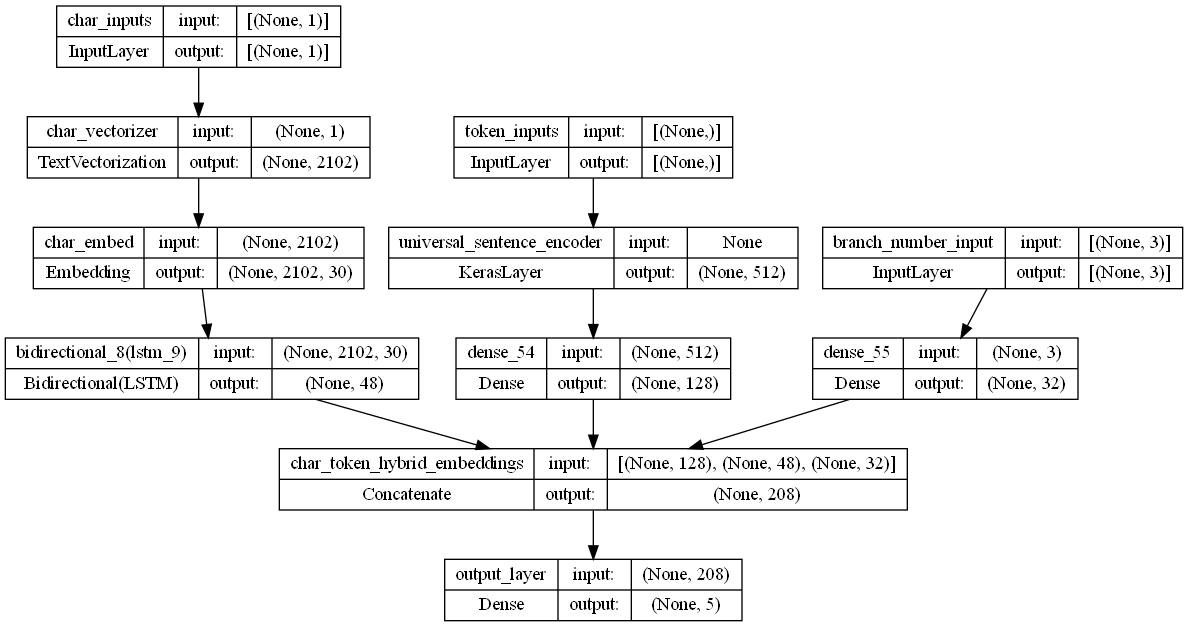

In [265]:
#Plot model_10 to explore it visually...
from tensorflow.keras.utils import plot_model
plot_model(model_10,show_shapes=True)

In [266]:
# Compile token,char and positional embedding model
model_10.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), #helps to prevent overfitting
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

### Create tribrid embedding datasets using tf.data

In [267]:
#Create training and validation datasets(with all four kind of input data)

train_char_token_pos_data=tf.data.Dataset.from_tensor_slices((X_train[['Review_Text']].values.ravel(),train_chars,
                                                             train_branch_numbers_one_hot))

train_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)


train_char_token_pos_dataset=tf.data.Dataset.zip((train_char_token_pos_data,train_char_token_pos_labels))

train_char_token_pos_dataset=train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

#The same for test data

test_char_token_pos_data=tf.data.Dataset.from_tensor_slices((X_test[['Review_Text']].values.ravel(),test_chars,
                                                             test_branch_numbers_one_hot))

test_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(test_labels_one_hot)


test_char_token_pos_dataset=tf.data.Dataset.zip((test_char_token_pos_data,test_char_token_pos_labels))

test_char_token_pos_dataset=test_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

### Fitting, evaluating and making predictions with our tribrid model

In [268]:
#Fit our tribrid embedding modeel
history_model_10=model_10.fit(train_char_token_pos_dataset,
                            steps_per_epoch=int(0.1*len(train_char_token_pos_dataset)),
                            epochs=5,
                            validation_data=test_char_token_pos_dataset,
                            validation_steps=int(0.1*len(test_char_token_pos_dataset)))

Epoch 1/5
93/93 [==============================] - 276s 3s/step - loss: 1.3250 - accuracy: 0.5450 - val_loss: 1.2632 - val_accuracy: 0.5461
Epoch 2/5
93/93 [==============================] - 236s 3s/step - loss: 1.2398 - accuracy: 0.5783 - val_loss: 1.2233 - val_accuracy: 0.5867
Epoch 3/5
93/93 [==============================] - 238s 3s/step - loss: 1.2301 - accuracy: 0.5662 - val_loss: 1.2152 - val_accuracy: 0.5977
Epoch 4/5
93/93 [==============================] - 235s 3s/step - loss: 1.2119 - accuracy: 0.5974 - val_loss: 1.2058 - val_accuracy: 0.6008
Epoch 5/5
93/93 [==============================] - 232s 2s/step - loss: 1.2159 - accuracy: 0.5894 - val_loss: 1.2018 - val_accuracy: 0.6023


In [269]:
#Make predictions with the char token model
model_10_preds_probs=model_10.predict(test_char_token_pos_dataset,verbose=0)
model_10_preds_probs

array([[0.02956819, 0.04274859, 0.1004485 , 0.24126187, 0.5859728 ],
       [0.15021297, 0.200841  , 0.26127547, 0.20693755, 0.18073303],
       [0.08269668, 0.09659122, 0.16305734, 0.20730746, 0.45034721],
       ...,
       [0.05549091, 0.08109991, 0.19897072, 0.36275274, 0.30168566],
       [0.02892916, 0.03893516, 0.07540084, 0.192651  , 0.66408384],
       [0.0160662 , 0.01836907, 0.03124019, 0.11846574, 0.8158588 ]],
      dtype=float32)

In [270]:
#Convert pred probs to pred labels
model_10_preds=tf.argmax(model_10_preds_probs,axis=1)
model_10_preds

<tf.Tensor: shape=(12797,), dtype=int64, numpy=array([4, 2, 4, ..., 3, 4, 4], dtype=int64)>

In [271]:
#Calculate results of char token pos model
model_10_results=calculate_results(test_labels_encoded,
                                  model_10_preds)

model_10_results

{'accuracy': 0.603, 'precision': 0.553, 'recall': 0.603, 'f1': 0.535}

## Comparing the performance of each of our models

In [272]:
#Combining model results into a DataFrame
all_model_results=pd.DataFrame({'Model 0: Best Basic ML Model':baseline_results,
                                "Model 1: Dense model using Sequential API + TF-IDF ":model_1_results,
                                "Model 2: Conv1D with token embeddings":model_2_results,
                                "Model 3: LSTM":model_3_results,
                                "Model 4: GRU":model_4_results,
                                "Model 5: Bidirectional RNN":model_5_results,
                                "Model 6: Feature Extraction with pretrained token embeddings":model_6_results,
                                "Model 7: Pretrained token embeddings + characters embeddings":model_7_results,
                                "Model 8: Pretrained token embeddings + the Branch One Hot Data": model_8_results,
                                "Model 9: Character embeddings + the Branch One Hot Data":model_9_results,
                                "Model 10: Pretrained token embeddings +  Character embeddings + the Branch One Hot Data":model_10_results})
 
all_model_results=all_model_results.T

all_model_results

,accuracy,precision,recall,f1
Model 0: Best Basic ML Model,0.629,0.594,0.629,0.601
Model 1: Dense model using Sequential API + TF-IDF,0.543,0.294,0.543,0.382
Model 2: Conv1D with token embeddings,0.616,0.562,0.616,0.584
Model 3: LSTM,0.596,0.541,0.596,0.566
Model 4: GRU,0.605,0.603,0.605,0.596
Model 5: Bidirectional RNN,0.612,0.596,0.612,0.600
Model 6: Feature Extraction with pretrained token embeddings,0.606,0.583,0.606,0.587
Model 7: Pretrained token embeddings + characters embeddings,0.600,0.601,0.600,0.596
Model 8: Pretrained token embeddings + the Branch One Hot Data,0.613,0.596,0.613,0.590
Model 9: Character embeddings + the Branch One Hot Data,0.536,0.392,0.536,0.436


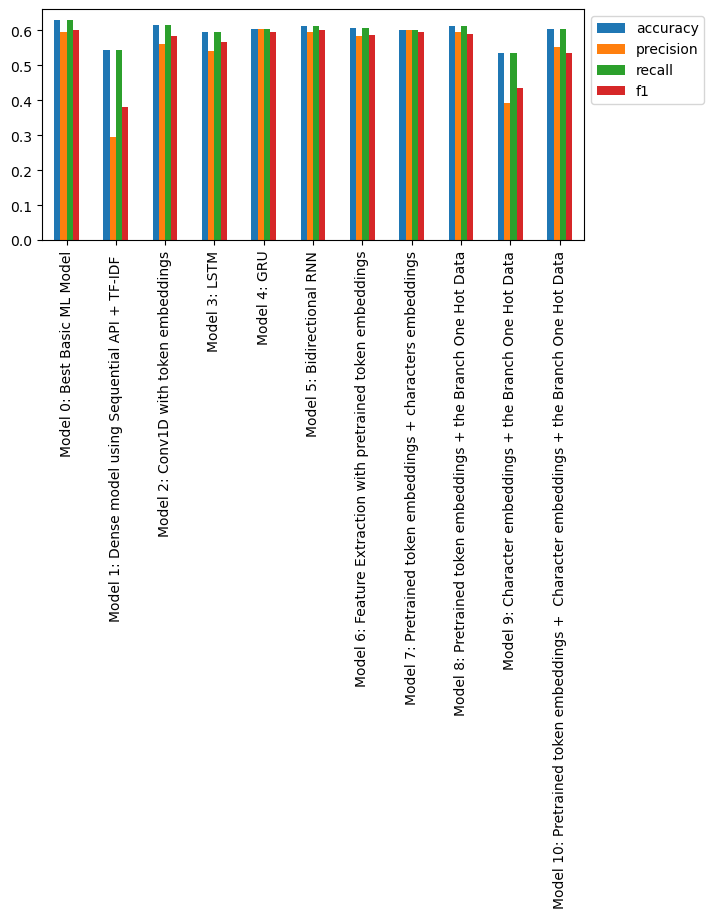

In [273]:
#Plot and compare all of the model results
all_model_results.plot(kind='bar',figsize=(7,3)).legend(bbox_to_anchor=(1,1));

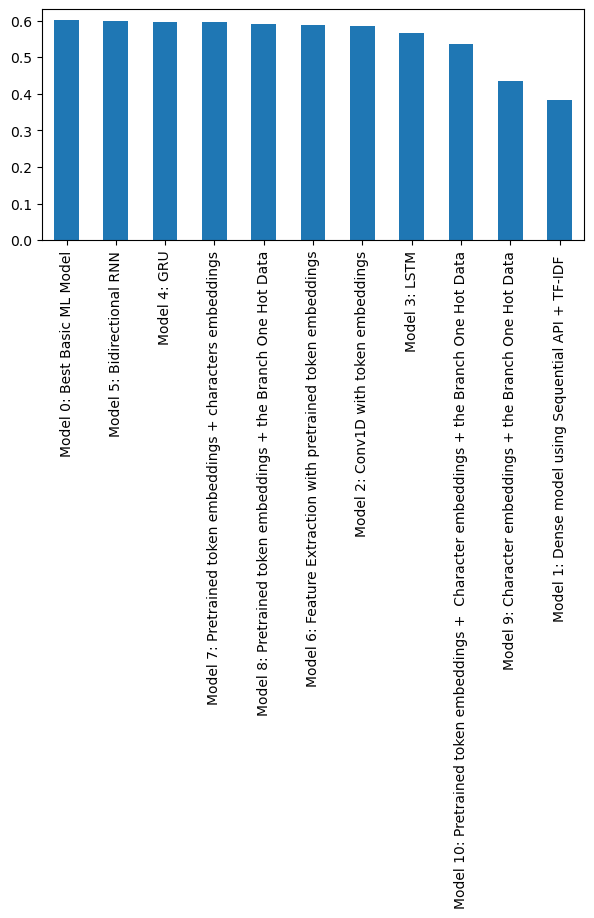

In [274]:
#Sort model results by f1-score
all_model_results.sort_values("f1",ascending=False)["f1"].plot(kind='bar',figsize=(7,3));

## Finding the most wrong examples

In [284]:
#Making predictions with one of the best models (Model_5)
model_5_pred_probs=model_5.predict(test_dataset)
model_5_preds=np.argmax(model_5_pred_probs,axis=1)
model_5_preds

400/400 [==============================] - 152s 372ms/step


array([4, 2, 4, ..., 3, 4, 4], dtype=int64)

In [285]:
#Create a DataFrame with test sentences, validation labels and best performing model prediction labels + probabilities
test_df=pd.DataFrame({"text":X_test[["Review_Text"]].values.ravel(),
                     "target":test_labels_encoded,
                     "pred":model_5_preds,
                     "pred_prob":np.max(model_5_pred_probs)


})

test_df.head()


,text,target,pred,pred_prob
0,the happiest place on earth. disneyland hong k...,3,4,0.992
1,we visited disneyland paris from march 20th ...,3,2,0.992
2,"i have been a guest, but also an employee at d...",4,4,0.992
3,"first thing first, you need to have the flyers...",4,4,0.992
4,for my surprise tickets were 80 per person per...,4,0,0.992


In [286]:
#Find the wrong predictions and sort by prediction probabilities
most_wrong=test_df[test_df["target"]!=test_df["pred"]].sort_values("pred_prob",ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
0,the happiest place on earth. disneyland hong k...,3,4,0.992
8474,i grew up on disneyland. it seems to take your...,3,4,0.992
8488,"i suggest instead of giving it just a day,rath...",4,3,0.992
8484,"if you exclude the people and the high cost, i...",1,3,0.992
8480,visited disneyland paris for 4 days in septemb...,4,3,0.992
8479,the name of this place should be changed to di...,1,3,0.992
8478,loved coming here while staying for 3 days in ...,4,3,0.992
8476,we visited disneyland for 4 days 3 nights last...,3,4,0.992
8475,we booked our 2days pass tickets in uk via the...,1,3,0.992
8468,the disneyland resort is currently go through ...,3,4,0.992


In [287]:
for row in most_wrong[:10].itertuples():
  _,text,target,pred,pred_prob=row
  print(f"Target:{target}, Pred:{pred}, Prob:{pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target:3, Pred:4, Prob:0.9918487071990967
Text:
the happiest place on earth. disneyland hong kong does not disappoint.re creating many of the exact features of the original one in california but on a much smaller scale, the theme park contains the usual four disney themed lands along with classic rides and attractions, as well as high caliber performances, shows and parades. don't miss the space mountain ride and feel like a real space rider. and before the day ends witness the night sky come alive with this dazzling pyrotechnic pageant   disney in the stars!the park is small enough that all attractions should be accessible in one day. the tickets may be slightly expensive, but they're worth it. all in all, disneyland is a wonderful place, and i recommend giving it a chance!

----

Target:3, Pred:4, Prob:0.9918487071990967
Text:
i grew up on disneyland. it seems to take your cares away for a day. but nowadays,it's a struggle to walk through the park, or even plan a meal. if you spend 8